# [Cardio Vascular Dataset](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset)

## Team Members
- Muzammil Husnain
- Umair Saeed

We have been doing pair programming so equally contributed.

# EDA + Data Prep

We have 700,000 samples dataset. To reduce execution time we have decreased dataset to 500.

Note: Accuracy score increases when using high number of samples.

### Features (X)
- Age | Objective Feature | age | int (days)
- Height | Objective Feature | height | int (cm)
- Weight | Objective Feature | weight | float (kg)
- Gender | Objective Feature | gender | categorical code
- Systolic blood pressure | Examination Feature | ap_hi | int
- Diastolic blood pressure | Examination Feature | ap_lo | int
- Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal
- Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal
- Smoking | Subjective Feature | smoke | binary
- Alcohol intake | Subjective Feature | alco | binary
- Physical activity | Subjective Feature | active | binary

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from pandas import DataFrame

file_path = 'cardio_train_dataset.csv'

cardio_data_frame = pd.read_csv(file_path)

cardio_data_frame = cardio_data_frame.head(500)

cardio_data_frame.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,M,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,F,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,F,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,M,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,F,156,56.0,100,60,1,1,0,0,0,0


## Categorical Feature - One Hot Encoding

we will map our categorical feature to numerical values

In [2]:
from sklearn.preprocessing import LabelEncoder

cardio_data_frame['gender'] = LabelEncoder().fit_transform(cardio_data_frame['gender'])
cardio_data_frame.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,1,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,0,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,0,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,1,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,0,156,56.0,100,60,1,1,0,0,0,0


## Data Imputation

dropping null values and removing unnecessary id column.  Calculating age and bmi using features.

In [3]:
cardio_data_frame = cardio_data_frame.dropna()

cardio_data_frame = cardio_data_frame.drop('id', axis=1)

cardio_data_frame['age'] = round(cardio_data_frame['age'] / 365)

cardio_data_frame['bmi'] = round(cardio_data_frame['weight'] / (cardio_data_frame['height'] / 100) ** 2)

cardio_data_frame.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50.0,1,168,62.0,110,80,1,1,0,0,1,0,22.0
1,55.0,0,156,85.0,140,90,3,1,0,0,1,1,35.0
2,52.0,0,165,64.0,130,70,3,1,0,0,0,1,24.0
3,48.0,1,169,82.0,150,100,1,1,0,0,1,1,29.0
4,48.0,0,156,56.0,100,60,1,1,0,0,0,0,23.0


# Outliers Standardization

In [4]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(cardio_data_frame)

cardio_data_frame_std = scaler.transform(cardio_data_frame)


#cardio_data_frame.mean(axis=0)

#cardio_data_frame.std(axis=0)

In [5]:
cardio_features = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco',
                   'active', 'bmi']

X = cardio_data_frame[cardio_features]
X.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
count,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000,500.000000,500.00000,500.000000,500.000000
mean,53.58800,0.358000,164.048000,74.426600,128.206000,92.308000,1.390000,1.2280,0.094000,0.04200,0.786000,27.736000
std,6.64127,0.479892,9.192535,16.251339,17.453619,99.929119,0.691995,0.5733,0.292121,0.20079,0.410538,6.379004
min,39.00000,0.000000,76.000000,41.000000,80.000000,30.000000,1.000000,1.0000,0.000000,0.00000,0.000000,17.000000
25%,49.00000,0.000000,158.000000,64.000000,120.000000,80.000000,1.000000,1.0000,0.000000,0.00000,1.000000,24.000000
50%,54.00000,0.000000,164.000000,72.000000,120.000000,80.000000,1.000000,1.0000,0.000000,0.00000,1.000000,27.000000
75%,59.00000,1.000000,170.000000,84.000000,140.000000,90.000000,2.000000,1.0000,0.000000,0.00000,1.000000,30.000000
max,65.00000,1.000000,188.000000,200.000000,190.000000,1100.000000,3.000000,3.0000,1.000000,1.00000,1.000000,95.000000


### Y Axis
 - Presence or absence of cardiovascular disease | Target Variable | cardio | binary

In [6]:
Y = cardio_data_frame.cardio
Y.describe()


count    500.000000
mean       0.526000
std        0.499824
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: cardio, dtype: float64

# Data Distributions - Visualizations


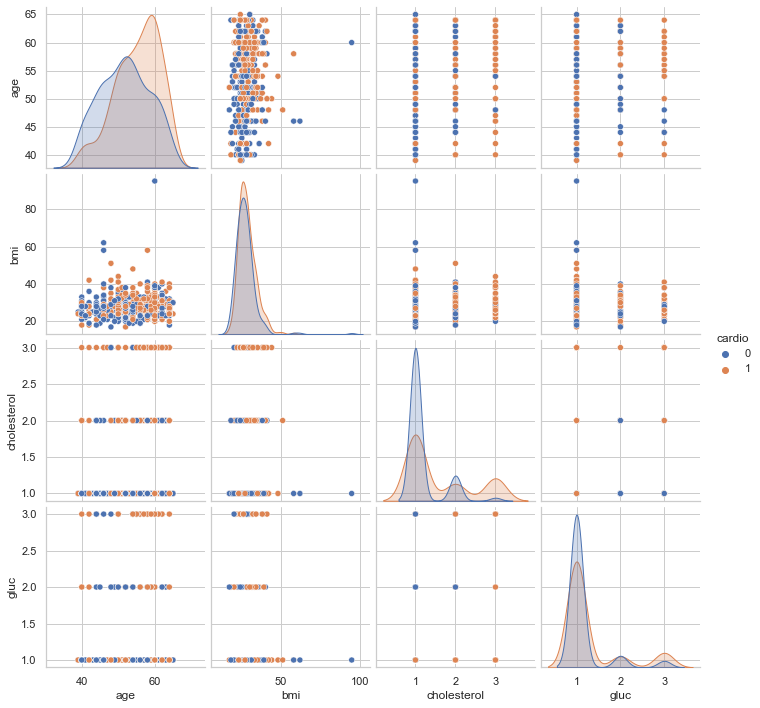

In [7]:
import seaborn as sns

sns.set_theme(style='whitegrid')

cardio_features = ['age', 'bmi', 'cholesterol', 'gluc', 'cardio']

#sns.pairplot(x_vars=cardio_features, y_vars=cardio_features, data=cardio_data_frame, palette='bright')
#cardio_data_frame[cardio_features].corr()

sns.pairplot(data=cardio_data_frame[cardio_features], hue='cardio')

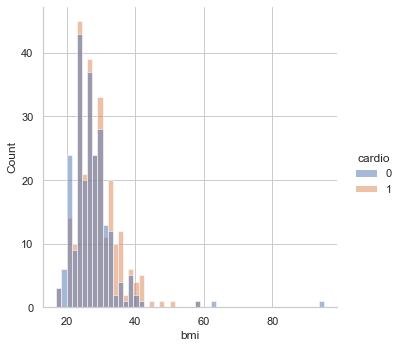

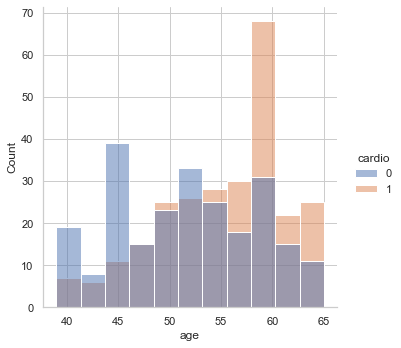

In [8]:
sns.displot(data=cardio_data_frame, x='bmi', hue='cardio')

sns.displot(data=cardio_data_frame, x='age', hue='cardio')

# x_melted = pd.melt(frame=cardio_data_frame, id_vars="cardio", value_vars=cardio_features, var_name="features", value_name="value", col_level=None)
# x_melted
#
# from matplotlib import pyplot as plt
#
# plt.figure(figsize=(10,10))
# sns.boxplot(x="features", y="value", hue="cardio", data=x_melted)
# plt.xticks(rotation=90)


# Model Tuning


# Split the Dataset

We are splitting test data set size to 20%.

In [9]:
from sklearn.model_selection import train_test_split

trainX, validationX, trainY, validationY = train_test_split(X, Y, test_size=0.2, random_state=0)


 # 1. Decision Tree Model Implementation

In [10]:
from sklearn.tree import DecisionTreeClassifier

# Define model. Specify a number for random_state to ensure same results each run
cardio_decision_tree_model = DecisionTreeClassifier(random_state=1)

#Fitting Model
cardio_decision_tree_model.fit(trainX, trainY)

valPredictions = cardio_decision_tree_model.predict(validationX)

### Mean Absolute Error DT

In [11]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(validationY, valPredictions)



0.32

 # 2. KNN Model Implementation

In [12]:
from sklearn.neighbors import KNeighborsClassifier

cardio_decision_knn_model = KNeighborsClassifier()

cardio_decision_knn_model.fit(trainX, trainY)

valPredictions = cardio_decision_knn_model.predict(validationX)


### Mean Absolute Error

In [13]:
mean_absolute_error(validationY, valPredictions)

0.26

 # 3. SVM Model Implementation

In [14]:
from sklearn.svm import SVC

cardio_decision_svc_model = SVC()

cardio_decision_svc_model.fit(trainX, trainY)

valPredictions = cardio_decision_svc_model.predict(validationX)


### Mean Absolute Error

In [15]:
mean_absolute_error(validationY, valPredictions)

0.32

 # 4. NN Model Implementation

In [16]:
from sklearn.neural_network import MLPClassifier

cardio_decision_nn_model = MLPClassifier(alpha=1e-5,
                                         hidden_layer_sizes=(25, 14), random_state=5)

cardio_decision_nn_model.fit(trainX, trainY)

valPredictions = cardio_decision_nn_model.predict(validationX)

### Mean Absolute Error

In [17]:
mean_absolute_error(validationY, valPredictions)


0.3

 # 5. Logistic Regression Model Implementation
The logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc. Each object being detected in the image would be assigned a probability between 0 and 1, with a sum of one.

In [18]:
from sklearn.linear_model import LogisticRegression

cardio_decision_lr_model = LogisticRegression(random_state=1, solver='saga')

cardio_decision_lr_model.fit(trainX, trainY)

valPredictions = cardio_decision_lr_model.predict(validationX)

/Users/umairsaeed/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


### Mean Absolute Error

In [19]:
mean_absolute_error(validationY, valPredictions)

0.32

 # 6. Ensemble Model Implementation

In [20]:
from sklearn.ensemble import VotingClassifier

cardio_decision_voting_model = bagging =  VotingClassifier(estimators=[('lr', cardio_decision_lr_model),
                                                                       ('nn', cardio_decision_nn_model),
                                                                       ('svc', cardio_decision_svc_model),
                                                                       ('tree', cardio_decision_tree_model),
                                                                       ('knn', cardio_decision_knn_model),
                                                                       ], voting='hard')

cardio_decision_voting_model.fit(trainX, trainY)

valPredictions = cardio_decision_voting_model.predict(validationX)

/Users/umairsaeed/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


### Mean Absolute Error

In [21]:
mean_absolute_error(validationY, valPredictions)

0.3

### Complexity Curves

In [22]:
import numpy as np
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
from sklearn.model_selection import validation_curve


def validation_curve_model(X, Y, model, param_name, parameters, cv, ylim, log=True):
    train_scores, test_scores = validation_curve(model, X, Y, param_name=param_name, param_range=parameters, cv=cv,
                                                 scoring="accuracy")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title("Complexity curve")
    plt.fill_between(parameters, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(parameters, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")

    if log == True:
        plt.semilogx(parameters, train_scores_mean, 'o-', color="r", label="Training score")
        plt.semilogx(parameters, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    else:
        plt.plot(parameters, train_scores_mean, 'o-', color="r", label="Training score")
        plt.plot(parameters, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    #plt.ylim([0.55, 0.9])
    if ylim is not None:
        plt.ylim(*ylim)

    plt.ylabel('Score')
    plt.xlabel(param_name)
    plt.legend(loc="best")

    return plt

### Complexity Curve KNN

<module 'matplotlib.pyplot' from '/Users/umairsaeed/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

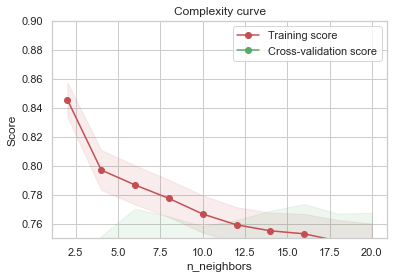

In [23]:
param_range = np.linspace(2, 20, 10).astype(int)
param_name = "n_neighbors"
ylim = [0.75, 0.90]
validation_curve_model(X, Y, KNeighborsClassifier(), "n_neighbors", param_range, cv, ylim, log=False)

### Complexity Curve SVM

<module 'matplotlib.pyplot' from '/Users/umairsaeed/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

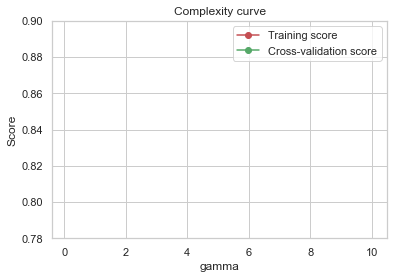

In [24]:
param_range = np.linspace(0.1, 10, 10)
param_name = "C"
ylim = [0.78, 0.90]
validation_curve_model(X, Y, cardio_decision_svc_model, "gamma", param_range, cv, ylim, log=False)



### Learning Curves

In [25]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve


def learning_curve_model(X, Y, model, cv, train_sizes):
    plt.figure()
    plt.title("Learning curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(model, X, Y, cv=cv, n_jobs=4, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()


cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
train_size = np.linspace(.1, 1.0, 15)




### Learning Curve LR

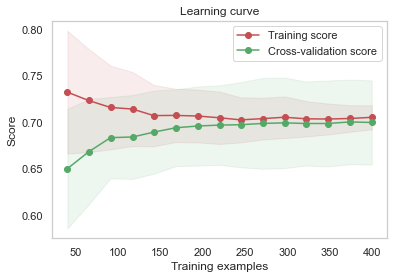

In [26]:
learning_curve_model(X, Y, cardio_decision_lr_model, cv, train_size)

### Learning Curve NN

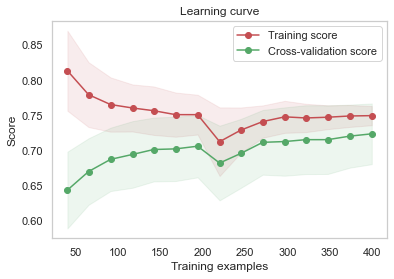

In [27]:
learning_curve_model(X, Y, cardio_decision_nn_model, cv, train_size)

### Learning Curve KNN

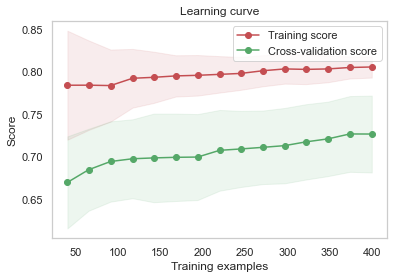

In [28]:
learning_curve_model(X, Y, cardio_decision_knn_model, cv, train_size)

### Learning Curve DT

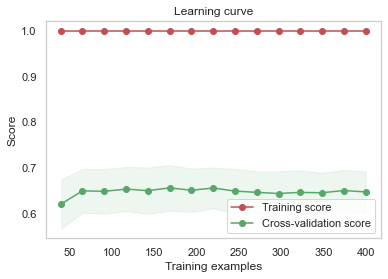

In [29]:
learning_curve_model(X, Y, cardio_decision_tree_model, cv, train_size)

### Learning Curve SVM

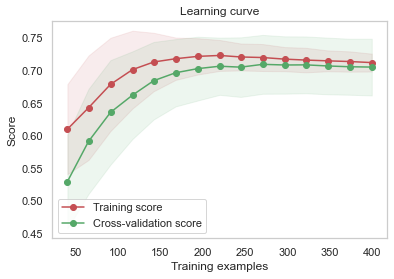

In [30]:
learning_curve_model(X, Y, cardio_decision_svc_model, cv, train_size)

### Learning Curve Ensemble Voting Classifier

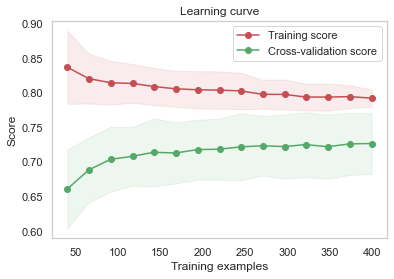

In [31]:
learning_curve_model(X, Y, cardio_decision_voting_model, cv, train_size)

### Model Comparison / Accuracy Score

/Users/umairsaeed/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/umairsaeed/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


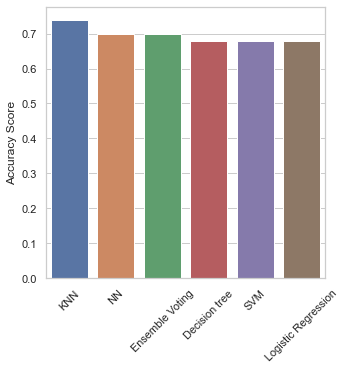

In [32]:
def drawAcuuracyGraph():
    models = {"Decision tree": cardio_decision_tree_model,
              "NN": cardio_decision_nn_model,
              "KNN": cardio_decision_knn_model,
              "SVM": cardio_decision_svc_model,
              "Logistic Regression": cardio_decision_lr_model,
              "Ensemble Voting": cardio_decision_voting_model}

    scores = {}

    for key, value in models.items():
        model = value
        model.fit(trainX, trainY)
        scores[key] = model.score(validationX, validationY)

    scores_frame = pd.DataFrame(scores, index=["Accuracy Score"]).T
    scores_frame.sort_values(by=["Accuracy Score"], axis=0, ascending=False, inplace=True)

    plt.figure(figsize=(5, 5))
    sns.barplot(x=scores_frame.index, y=scores_frame["Accuracy Score"])
    plt.xticks(rotation=45)


drawAcuuracyGraph()

### AUC

/Users/umairsaeed/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


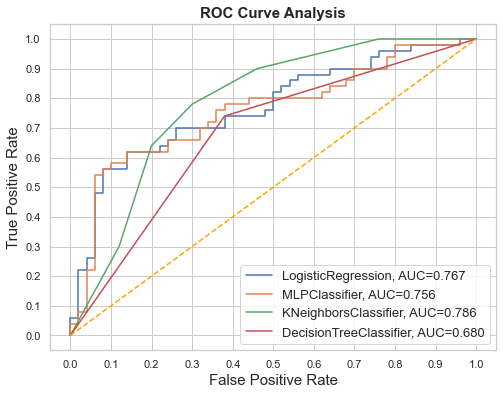

In [34]:
def drawauc():
    models = [cardio_decision_lr_model,
              cardio_decision_nn_model,
              cardio_decision_knn_model,
              cardio_decision_tree_model]

    result_table = pd.DataFrame(columns=['classifiers', 'fpr', 'tpr', 'auc'])
    from sklearn.metrics import roc_curve, roc_auc_score
    import numpy as np

    # Train the models and record the results

    for cls in models:
        model = cls.fit(trainX, trainY)
        yproba = model.predict_proba(validationX)[::, 1]

        fpr, tpr, _ = roc_curve(validationY, yproba)
        auc = roc_auc_score(validationY, yproba)

        result_table = result_table.append({'classifiers': cls.__class__.__name__,
                                            'fpr': fpr,
                                            'tpr': tpr,
                                            'auc': auc}, ignore_index=True)

        # Set name of the classifiers as index labels
    result_table.set_index('classifiers', inplace=True)

    fig = plt.figure(figsize=(8, 6))

    for i in result_table.index:
        plt.plot(result_table.loc[i]['fpr'],
                 result_table.loc[i]['tpr'],
                 label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

    plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.xlabel("False Positive Rate", fontsize=15)

    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel("True Positive Rate", fontsize=15)

    plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
    plt.legend(prop={'size': 13}, loc='lower right')

    plt.show()


drawauc()

### PCA

/Users/umairsaeed/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/umairsaeed/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/umairsaeed/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Users/umairsaeed/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


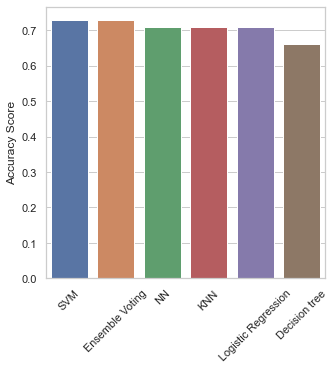

In [35]:
from sklearn.decomposition import PCA

pca = PCA(.95)
pca.fit(trainX)
trainX = pca.transform(trainX)
validationX = pca.transform(validationX)

drawAcuuracyGraph()